In [1]:
# import package
import numpy as np # Mengimport library numpy sebagai np
import pandas as pd # Mengimport library pandas sebagai pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot sebagai plt
import seaborn as sns # Import seaborn sebagai sns
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import library StandardScaler
from sklearn.model_selection import train_test_split # Import library train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import library mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm # Import statsmodels.api sebagai sm

In [2]:
dataset = pd.read_csv('\semester 5\pembelajaran mesin\week03\docs\insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Variabel Bebas : age, sex, bmi, children, smoker
Variabel Target : charges

In [4]:
# Slice Data
dataset1 = dataset.drop(['region'], axis=1)

# Encoding
le = LabelEncoder()
dataset1.sex = le.fit_transform(dataset1.sex)
dataset1.smoker = le.fit_transform(dataset1.smoker)

dataset1.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


c:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


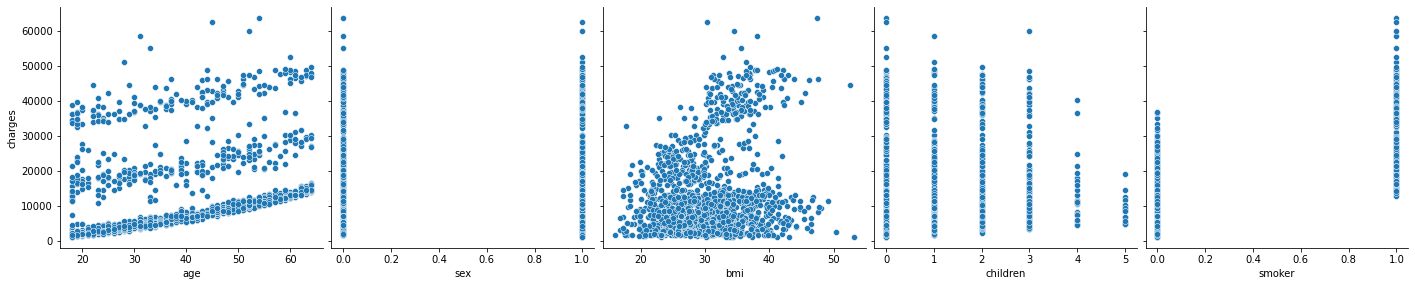

In [5]:
# Operasi visualisasi
sns.pairplot(dataset1, 
             x_vars=['age', 'sex','bmi', 'children', 'smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter') # Membuat pair plot
plt.show() # Menampilkan plot

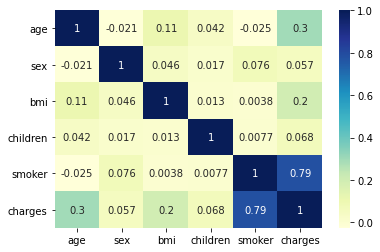

In [6]:
# Visualisasi korelasi dengan heatmap
sns.heatmap(dataset1.corr(), cmap="YlGnBu", annot=True)
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

In [7]:
X = dataset1.drop(['charges'], axis=1)
y = dataset1.charges.values

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Bagi data ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state= 100)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [9]:
X_train_sm = sm.add_constant(X_train) # Menambahkan konstanta (bias) ke set data pelatihan
lr = sm.OLS(y_train, X_train_sm).fit() # melakukan regresi linear menggunakan set data pelatihan yang telah disiapkan
lr.params # Menampilkan koefisien regresi

array([1.16558458e-02, 3.01369141e-01, 7.52383224e-04, 1.39942885e-01,
       4.59072181e-02, 7.99444829e-01])

In [10]:
# analisis statistika dari garis regresi
lr.summary()  # Menampilkan ringkasan statistik dari model regresi linear

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     518.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          7.46e-266
Time:                        22:10:33   Log-Likelihood:                -706.92
No. Observations:                 936   AIC:                             1426.
Df Residuals:                     930   BIC:                             1455.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0117      0.017      0.690      0.491      -0.022       0.045
x1             0.3014      0.017     17.738      0.000       0.268       0.335
x2             0.0008      0.017      0.044      0.965      -0.032       0.034
x3             0.1399      0.017      8.367      0.000       0.107       0.173
x4             0.0459      0.017      2.714      0.007       0.013       0.079
x5             0.7994      0.017     46.335      0.000       0.766       0.833
==============================================================================
Omnibus:                      222.862   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.835
Skew:                           1.269   Prob(JB):                    2.41e-115
Kurtosis:                       5.663   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [11]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test) # Menambahkan konstanta (bias) ke set data uji (X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm) # Melakukan prediksi terhadap variabel target (y_test)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [12]:
y_actual = y_test
y_pred = y_test_pred

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

# Menampilkan nilai setiap variabel
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.32184408252414876
MSE: 0.21788586115431385
RMSE: 0.4667824559195792
R-squared: 0.780095696440481


Dari evaluasi diatas menghasilkan R-squared yang baik yaitu 0.780095696440481, dimana nilai ini mendekati 1 Sedangkan dari MAE dan MSE juga baik, dikarenakan nilainya mendekai 0